# TP : Prédiction des frais d'assurance santé avec la régression et les KNN

## Objectif
Dans ce TP, vous allez explorer un jeu de données contenant des informations sur des personnes et leurs frais d'assurance. L'objectif est de prédire ces frais en utilisant des modèles de régression : régression linéaire et k plus proches voisins (KNN). Vous allez également analyser l'impact du nombre de voisins sur la performance du modèle KNN.

# 1. Importation des bibliothèques
Importer les bibliothèques nécessaires pour manipuler les données, les visualiser et construire les modèles de machine learning.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Chargement des données
Charger les données depuis le fichier insurance.csv disponible sur moodle.

In [21]:
df = pd.read_csv('insurance.csv')

# 3. Exploration des données
Analyser les premières lignes du dataset et quelques statistiques générales.

## Afficher les premières lignes du dataset

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Explications :**

Le modèle est un **modèle de régression** (variable cible = variable numérique) ayant pour variable cible la colonne **"charges"**.

## Afficher des statistiques générales sur les variables numériques

In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Vérifier les valeurs manquantes

In [24]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Visualiser la distribution de la variable cible (charges)

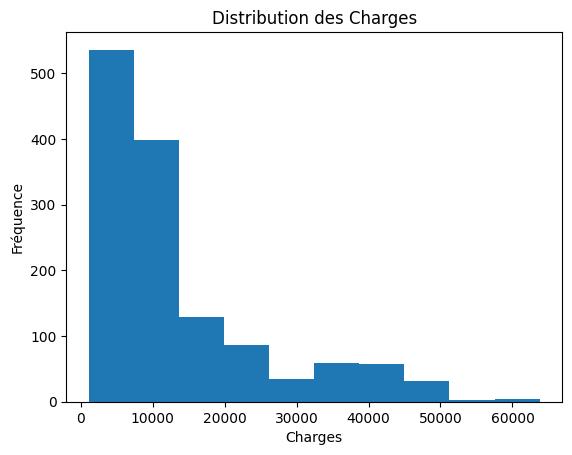

In [25]:
plt.hist(df['charges'])
plt.xlabel('Charges')
plt.ylabel('Fréquence')
plt.title('Distribution des Charges')
plt.show()

# 4. Prétraitement des données
### Encodage des variables catégorielles
Transformer les variables catégorielles en variables numériques avec `OrdinalEncoder`.

In [26]:
from re import X
from sklearn.preprocessing import OrdinalEncoder

ord_encoded = OrdinalEncoder()

df_categorielles = df.select_dtypes(include=['object', 'category']).columns
df[df_categorielles] = ord_encoded.fit_transform(df[df_categorielles])

features = df.columns[:-1]
X = df[features]
y = df['charges']

X.head()

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0


In [27]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


### Normalisation des variables numériques
Normaliser les variables numériques pour les mettre à l'échelle en utilisant `StandardScaler` ou `MinMaxScaler`

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_visu = pd.DataFrame(X, columns=features)
X_visu.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


# 5. Division en ensembles d'entraînement et de test
Séparer les données en un ensemble d'entraînement (80%) et un ensemble de test (20%).

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 6. Implémentation d'un modèle de régression linéaire
Créer et entraîner un modèle de régression linéaire.

In [30]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

# 7. Prédictions et évaluation du modèle linéaire
Évaluer les performances du modèle avec l'erreur quadratique moyenne (MSE) et le coefficient de détermination (R²) sur le dataset d'entrainement et de test. Que pensez-vous de la qualité de ce modèle?

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train_linear = ln.predict(X_train)
y_pred_test_linear = ln.predict(X_test)

mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

print('MSE train :', mse_train_linear)
print('MSE test :', mse_test_linear)
print('R² train :', r2_train_linear)
print('R² test :', r2_test_linear)

MSE train : 35584284.74289056
MSE test : 40626614.504103094
R² train : 0.7576079954379776
R² test : 0.7200390153045806


# **Explications :**

**MSE (Mean Squad Error) :** Mesure l'erreur moyenne au carré entre les valeurs réelles et les prédictions.
Dans notre cas, le MSE d'entraînement est légèrement inférieur à celui du test cela signifie qu'il y a un **léger sur-apprentissage du modèle**.
L'écart entre les deux valeurs est assez léger donc le **modèle est assez performant**.

**R² (Coefficient de détermination) :** Mesure la proportion de la variance des données qui est expliquée par le modèle. Plus il est proche de 1, plus le modèle est performant.
Dans notre cas, **pas de gros sur-apprentissage**, l'écart entre l'entrainement et le test est faible. Plus de **70%** de la variance des données sont expliqués par le modèle, en d'autres termes **les features utilisées expliquent bien la valeur cible**.

# 8. Implémentation d'un modèle KNN
Créer, entraîner et évaluer un modèle KNN avec `k=5`.

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

# 9. Étude de l'impact du nombre de voisins
Tester l'effet du nombre de voisins sur la performance du modèle KNN.
Vous devez produire un graphique qui affiche la MSE en ordonnées en fonction du nombre voisin (en abscisse). Les valeurs en entrainement et en test doivent être affichées

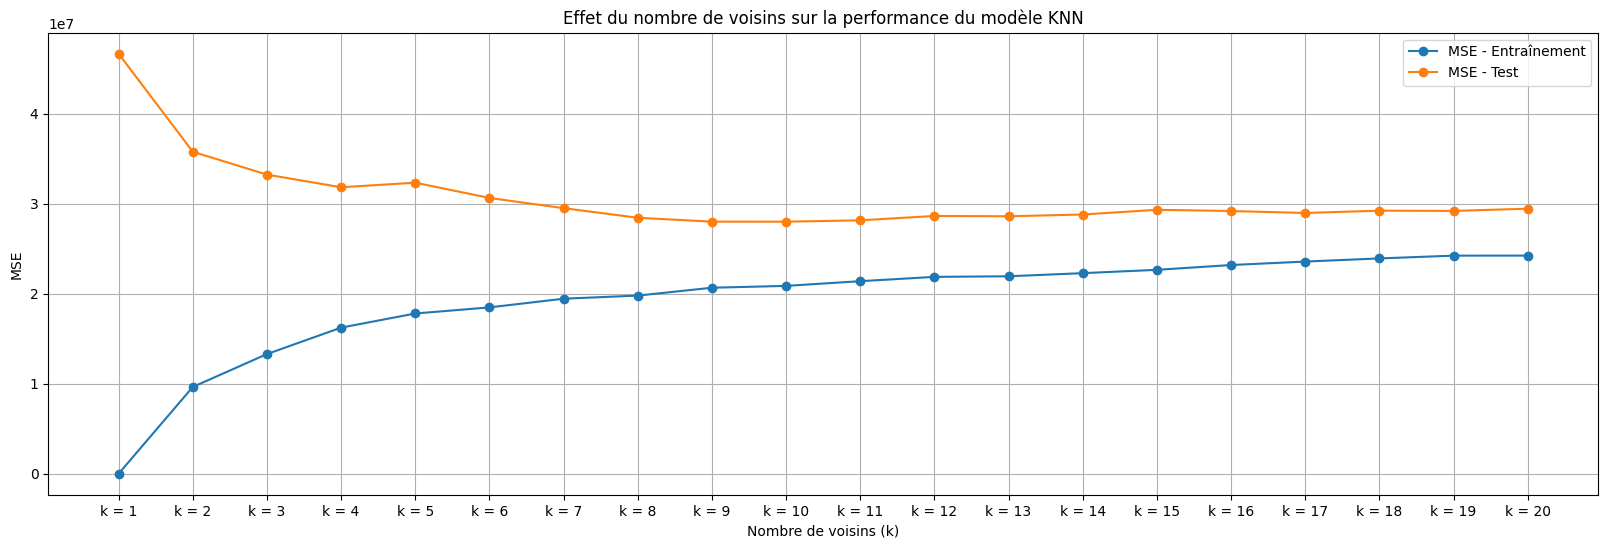

In [33]:
train_mse = []
test_mse = []
labels = []

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    labels.append('k = ' + str(k))

plt.figure(figsize=(20, 6))
plt.xticks(range(1,21), labels)
plt.plot(k_values, train_mse, label='MSE - Entraînement', marker='o')
plt.plot(k_values, test_mse, label='MSE - Test', marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('MSE')
plt.title('Effet du nombre de voisins sur la performance du modèle KNN')
plt.legend()
plt.grid(True)
plt.show()

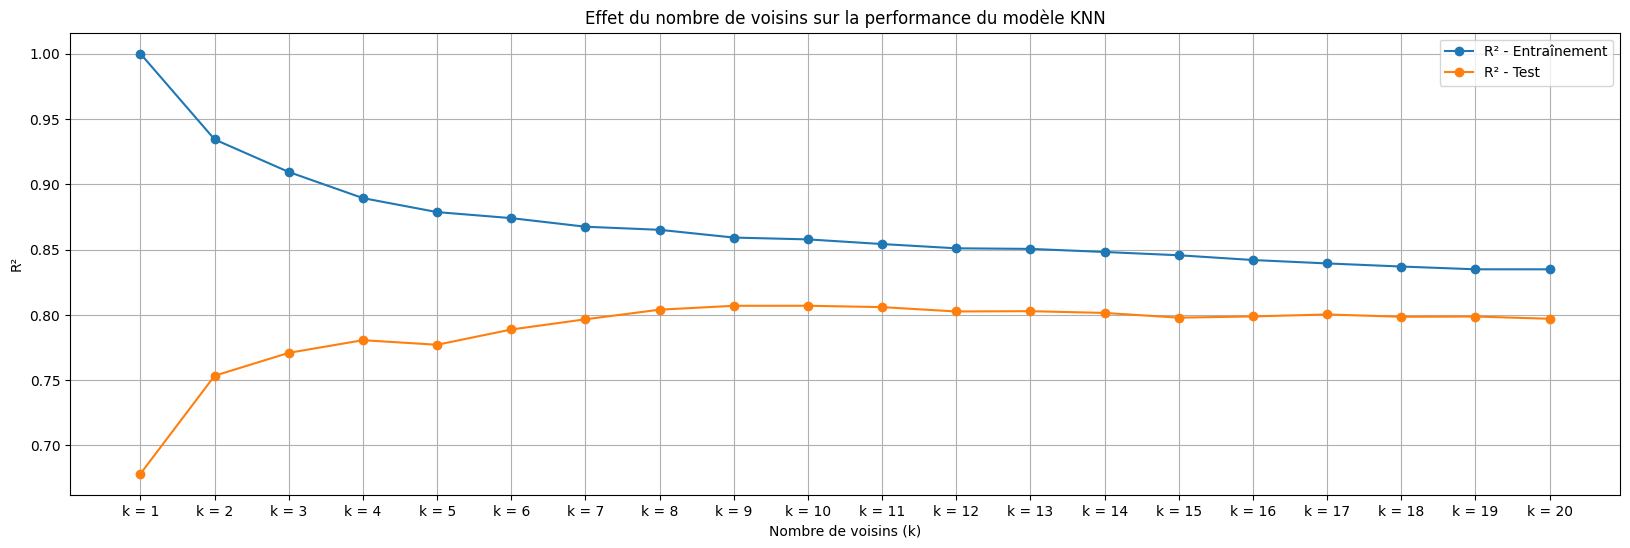

In [34]:
train_r2 = []
test_r2 = []
labels = []

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    labels.append('k = ' + str(k))

plt.figure(figsize=(20, 6))
plt.xticks(range(1,21), labels)
plt.plot(k_values, train_r2, label='R² - Entraînement', marker='o')
plt.plot(k_values, test_r2, label='R² - Test', marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('R²')
plt.title('Effet du nombre de voisins sur la performance du modèle KNN')
plt.legend()
plt.grid(True)
plt.show()

# 10. Analyse des résultats
- Quelle est l'importance des différentes variables dans la prédiction ?
- Quel est le meilleur choix pour le paramètre `k` ?

# **Explications :**


  *   Les variables permettent de déterminer les voisins les plus proches et ces voisins influencent directement la prédiction de la variable cible.
  *   Dans notre cas le meilleur choix serait 10 voisins car on attend le MSE test le plus bas et l'écart entre le MSE train et le MSE test est faible.



# 11. Pour les plus rapides ou à faire à la maison
Améliorer l'analyse de paramètres précédentes pour répeter plusieurs fois les entraintements sur des splits train/test différents. Afficher sur le plot la moyenne et les écart-types obtenus sur 20 splits différents.

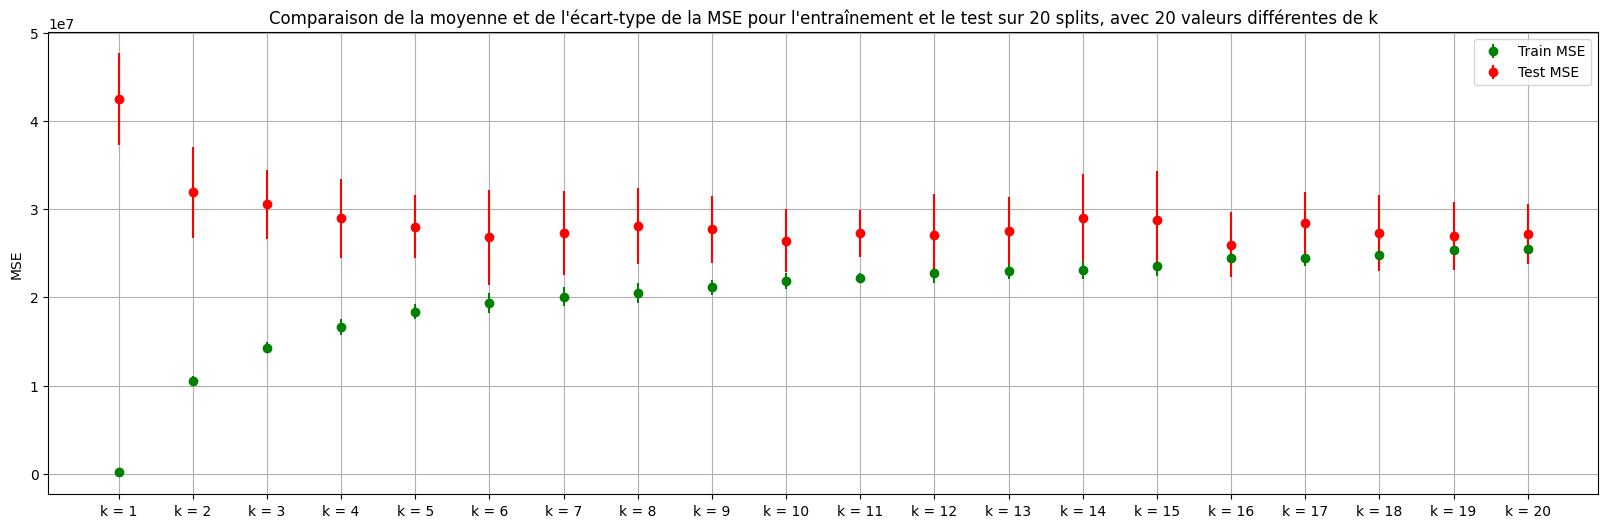

In [35]:
mse_train_moyenne = []
mse_train_ecart = []
mse_test_moyenne = []
mse_test_ecart = []
labels = []

for i in range(1, 21):  #Parcours des 20 valeurs de k différentes
    train_mse_knn = []
    test_mse_knn = []

    for j in range(21):   #Parcours des 20 splits différents
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)

        y_pred_train_knn = knn.predict(X_train)
        y_pred_test_knn = knn.predict(X_test)

        train_mse_knn.append(mean_squared_error(y_train, y_pred_train_knn))
        test_mse_knn.append(mean_squared_error(y_test, y_pred_test_knn))

    mse_train_moyenne.append(np.mean(train_mse_knn)) #moyenne
    mse_train_ecart.append(np.std(train_mse_knn))
    mse_test_moyenne.append(np.mean(test_mse_knn)) #ecart-type
    mse_test_ecart.append(np.std(test_mse_knn))

    labels.append('k = ' + str(i))

plt.figure(figsize=(20, 6))

for i in range(20): #Ajout des moyennes et des ecarts-types pour chaque k
    plt.errorbar(i+1, mse_train_moyenne[i], yerr=mse_train_ecart[i], fmt='o', color='green')
    plt.errorbar(i+1, mse_test_moyenne[i], yerr=mse_test_ecart[i], fmt='o', color='red')

plt.xticks(range(1,21), labels)

plt.ylabel('MSE')
plt.title("Comparaison de la moyenne et de l'écart-type de la MSE pour l'entraînement et le test sur 20 splits, avec 20 valeurs différentes de k")

plt.legend(['Train MSE', 'Test MSE'])

plt.grid(True)
plt.show()

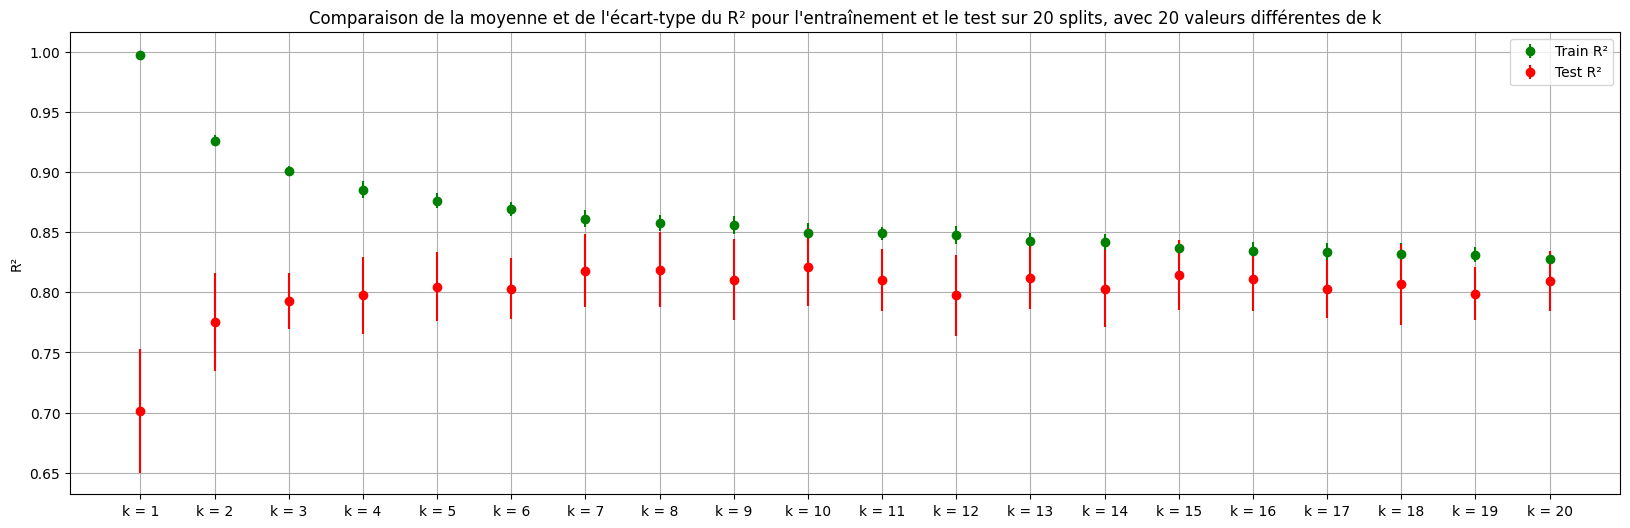

In [36]:
r2_train_moyenne = []
r2_train_ecart = []
r2_test_moyenne = []
r2_test_ecart = []
labels = []

for i in range(1, 21):  #Parcours des 20 valeurs de k différentes
    train_r2_knn = []
    test_r2_knn = []

    for j in range(21):   #Parcours des 20 splits différents
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)

        y_pred_train_knn = knn.predict(X_train)
        y_pred_test_knn = knn.predict(X_test)

        train_r2_knn.append(r2_score(y_train, y_pred_train_knn))
        test_r2_knn.append(r2_score(y_test, y_pred_test_knn))

    r2_train_moyenne.append(np.mean(train_r2_knn)) #moyenne
    r2_train_ecart.append(np.std(train_r2_knn))
    r2_test_moyenne.append(np.mean(test_r2_knn)) #ecart-type
    r2_test_ecart.append(np.std(test_r2_knn))

    labels.append('k = ' + str(i))

plt.figure(figsize=(20, 6))

for i in range(20): #Ajout des moyennes et des ecarts-types pour chaque k
    plt.errorbar(i+1, r2_train_moyenne[i], yerr=r2_train_ecart[i], fmt='o', color='green')
    plt.errorbar(i+1, r2_test_moyenne[i], yerr=r2_test_ecart[i], fmt='o', color='red')

plt.xticks(range(1,21), labels)

plt.ylabel('R²')
plt.title("Comparaison de la moyenne et de l'écart-type du R² pour l'entraînement et le test sur 20 splits, avec 20 valeurs différentes de k")

plt.legend(['Train R²', 'Test R²'])

plt.grid(True)
plt.show()

# 12. Autres modèles
Tester d'autres modèles de regression linéaire "simples" tels que des modèles polynomiaux, Lasso, ElasticNet ou Ridge